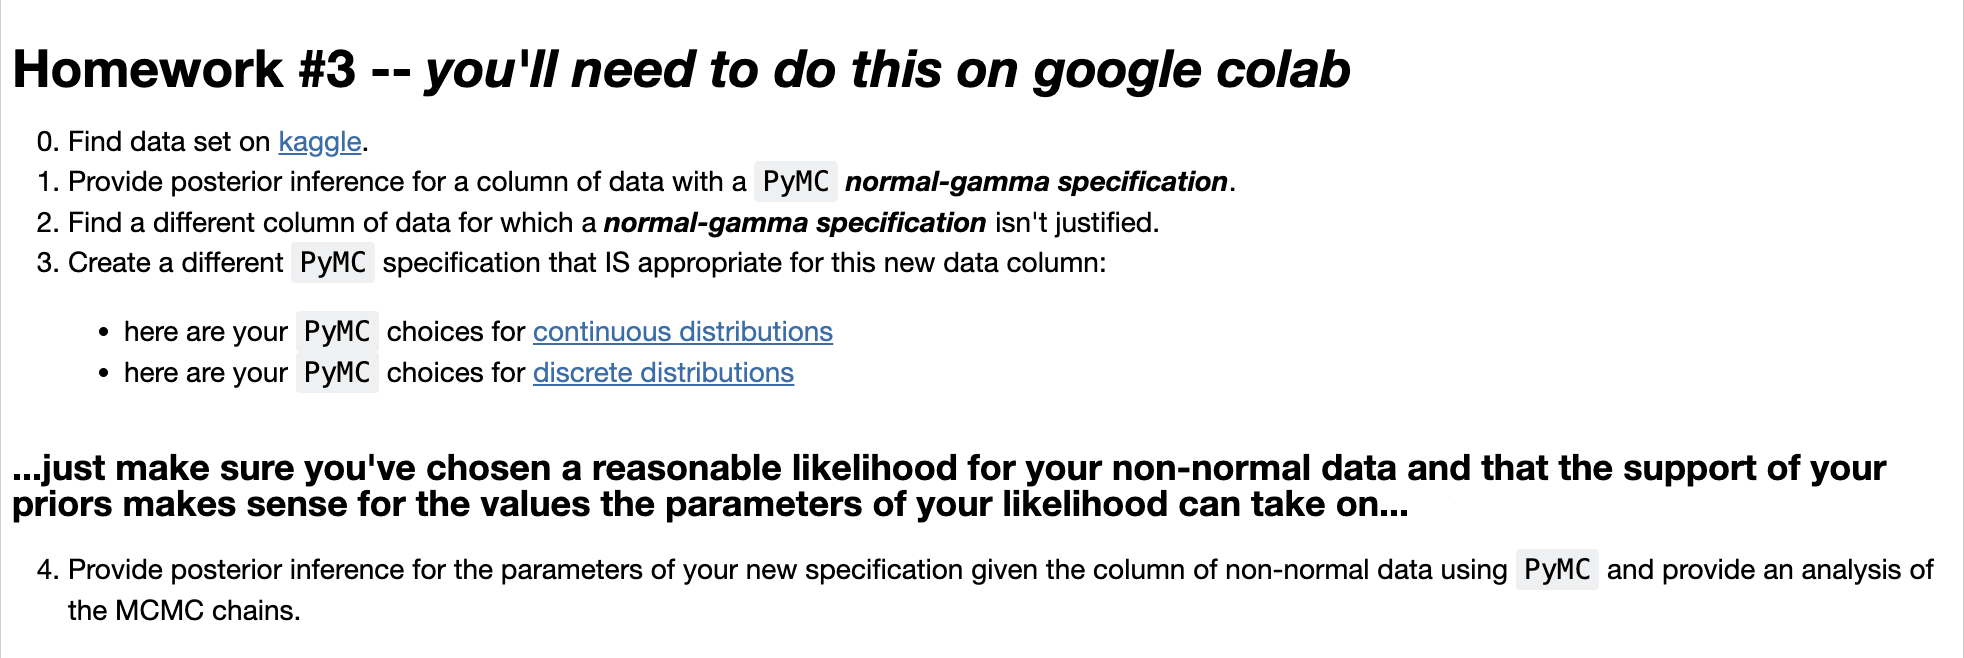

Part 0: I have found a dataset about "smokers' status", and here is the link toward the dataset: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction.


In [15]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('smoker.csv')

# Create a Summary Table
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,...,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000
mean,44.312006,164.555602,65.692782,82.009792,1.007182,1.004351,1.026095,1.026035,121.537587,76.029148,...,126.470254,57.283816,114.691525,14.618692,1.088820,0.885055,26.147235,26.781362,40.062246,0.210797
std,12.089099,9.210712,12.639255,9.150549,0.458500,0.467140,0.159423,0.159245,13.751759,9.727289,...,71.259041,15.018255,35.948974,1.559794,0.411293,0.223621,19.769301,30.085442,51.657330,0.407887
min,20.000000,135.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,79.000000,40.000000,...,16.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,107.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,30.000000,43.000000,0.000000
max,85.000000,190.000000,125.000000,125.800000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,...,405.000000,618.000000,1660.000000,20.900000,6.000000,10.300000,1311.000000,2062.000000,999.000000,1.000000


Part1: The variable I chose here is 'waist(cm)', a column of data with a PyMC normal-gamma specification.

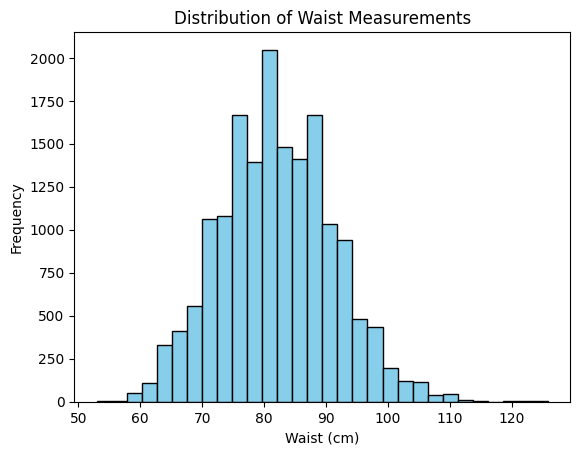

In [26]:
# Using histogram to examine 'waist(cm)''s distribution

plt.hist(data['waist(cm)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Waist Measurements')
plt.xlabel('Waist (cm)')
plt.ylabel('Frequency')
plt.show()

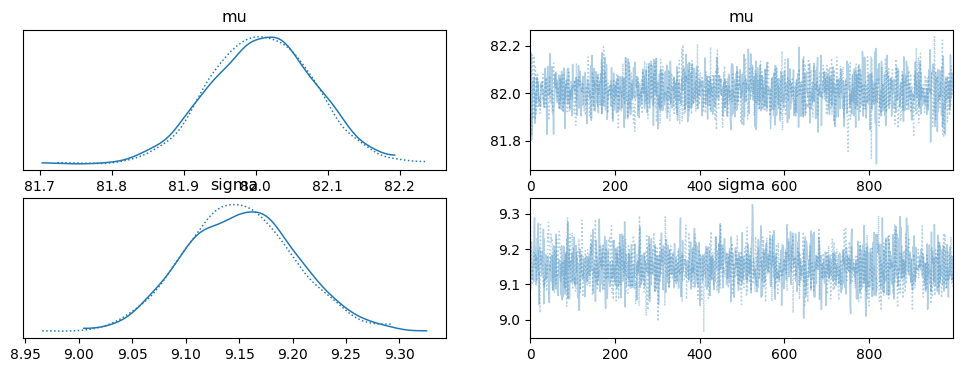

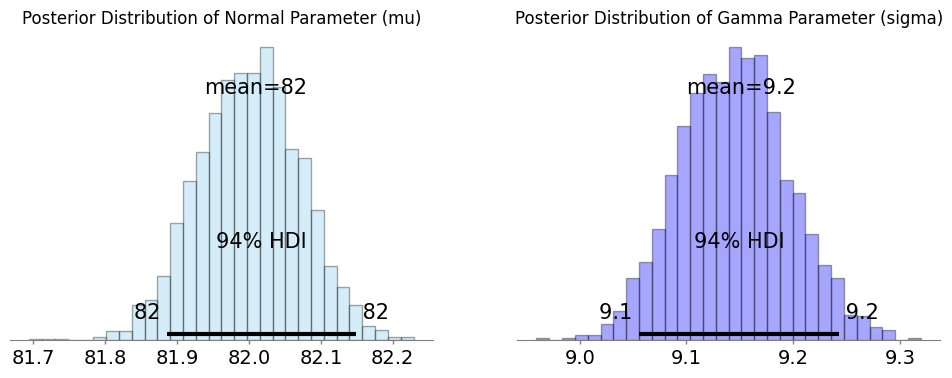

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,82.009,0.071,81.886,82.149,0.002,0.001,2196.0,1477.0,1.0
sigma,9.151,0.051,9.056,9.243,0.001,0.001,1762.0,1469.0,1.0


In [58]:
# Define the posterior inference for 'waist(cm)'

import pymc as pm
import arviz as az

normal_data = data['waist(cm)']

with pm.Model() as normal_gamma_model:
    mu = pm.Normal('mu', mu= normal_data.mean(), sigma=10)
    sigma = pm.Gamma('sigma', alpha=2, beta=1)
    observed_data = pm.Normal('observed_data', mu=mu, sigma=sigma, observed= normal_data)

with normal_gamma_model:
    trace_normal_gamma = pm.sample(1000, tune=1000)

az.plot_trace(trace_normal_gamma)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pm.plot_posterior(trace_normal_gamma, var_names=['mu'], ax=ax[0], kind='hist', bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Posterior Distribution of Normal Parameter (mu)')
pm.plot_posterior(trace_normal_gamma, var_names=['sigma'], ax=ax[1], kind='hist', bins=30, color='blue', edgecolor='black')
ax[1].set_title('Posterior Distribution of Gamma Parameter (sigma)')
plt.show()

az.summary(trace_normal_gamma)

We examined the waist measurements using PyMC. It helped us figure out the mean waist measurements (mu) and the variation across waist sizes (sigma). These results are called posterior inferences and give us a glimpse of the possible range and typical variation in average size. Think of it as a detective revealing the most likely scenarios based on the evidence in our data.

Part2: The variable I chose here is 'age', a different column of data for which a normal-gamma specification isn't justified.

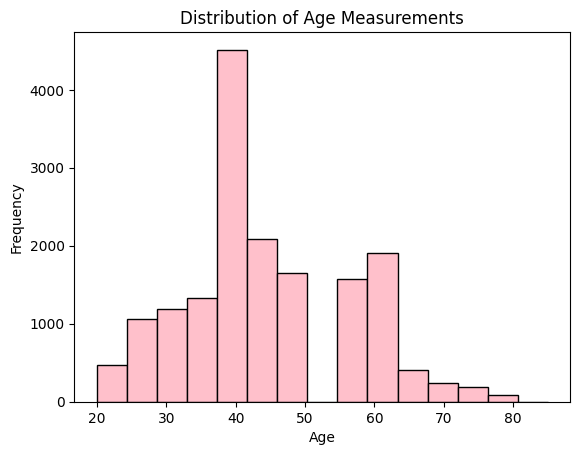

In [42]:
# Using histogram to examine 'age's distribution

plt.hist(data['age'], bins=15, color='pink', edgecolor='black')
plt.title('Distribution of Age Measurements')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Part3: Create a different PyMC specification that IS appropriate for 'Age'.

In [54]:
# Create a PyMC BetaBinomial specification for 'age'

non_normal_data = data['age']

with pm.Model() as non_normal_model:
    alpha = pm.Uniform('alpha', lower=0, upper=10)
    beta = pm.Uniform('beta', lower=0, upper=10)
    likelihood = pm.BetaBinomial('likelihood', alpha=alpha, beta=beta, n=16708, observed=non_normal_data)

with non_normal_model:
    trace_non_normal = pm.sample(1000, tune=1000)

When dealing with non-normally distributed data, it is crucial to choose the right discrete distribution for modeling. After examining the "non_normal_data" distribution, I chose the BetaBinomial distribution because it is suitable for situations involving binomial outcomes. In PyMC3, I modeled non-normality by defining the BetaBinomial distribution with prior parameters ("α" and "β"). We performed MCMC sampling, and subsequent analyses included examining trajectory plots and summary statistics for the posterior distributions of the parameters.

Part4: Provide posterior inference for 'Age' and provide an analysis of the MCMC chains.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.285,0.002,0.281,0.289,0.0,0.0,1076.0,977.0,1.0
beta,9.998,0.002,9.994,10.000,0.0,0.0,1239.0,892.0,1.0


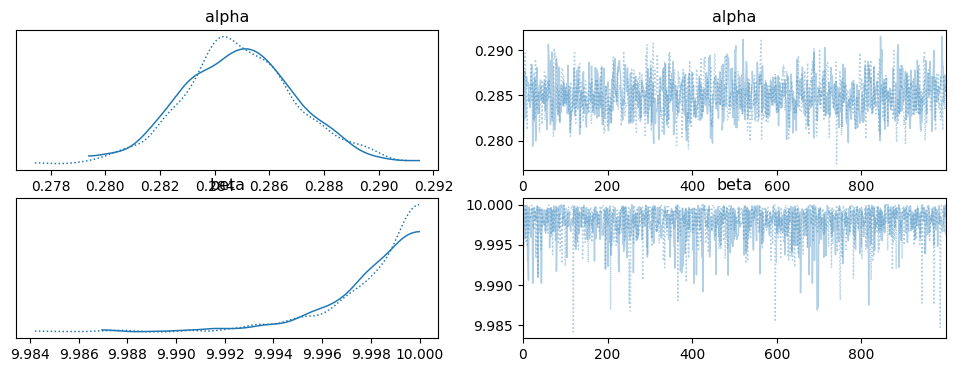

In [55]:
# Visualize the MCMC chains
pm.plot_trace(trace_non_normal)

# Define the posterior inference for 'Age'
pm.summary(trace_non_normal)

Through the above summary statistics for the parameters provided by posterior inference, we know that for the Alpha parameter, the mean value is 0.285, with a narrow standard deviation of 0.002. The 95% HDI indicates high precision in estimating the true value, falling between 0.281 and 0.289. Similarly, the Beta parameter shows a mean of 9.998, with a tight standard deviation of 0.002. The 95% HDI ranges from 9.994 to 10.000, indicating precise estimation. These results suggest that the BetaBinomial distribution effectively captures the characteristics of the non-normal data. The narrow credible intervals indicate precise estimation, and the effective sample sizes support the reliability of the MCMC sampling. Overall, the BetaBinomial model provides a satisfactory representation of the underlying distribution of the observed data.